<a target="_blank" href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL-Tutorials/blob/master/2-Advance/FinRL_Ensemble_StockTrading_ICAIF_2020.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Deep Reinforcement Learning for Stock Trading from Scratch: Multiple Stock¬†Trading Using Ensemble Strategy

Tutorials to use OpenAI DRL to trade multiple stocks using ensemble strategy in one Jupyter Notebook | Presented at ICAIF 2020

* This notebook is the reimplementation of our paper: Deep Reinforcement Learning for Automated Stock Trading: An Ensemble Strategy, using FinRL.
* Check out medium blog for detailed explanations: https://medium.com/@ai4finance/deep-reinforcement-learning-for-automated-stock-trading-f1dad0126a02
* Please report any issues to our Github: https://github.com/AI4Finance-LLC/FinRL-Library/issues
* **Pytorch Version**



# Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Python packages](#1)
    * [2.1. Install Packages](#1.1)    
    * [2.2. Check Additional Packages](#1.2)
    * [2.3. Import Packages](#1.3)
    * [2.4. Create Folders](#1.4)
* [3. Download Data](#2)
* [4. Preprocess Data](#3)        
    * [4.1. Technical Indicators](#3.1)
    * [4.2. Perform Feature Engineering](#3.2)
* [5.Build Environment](#4)  
    * [5.1. Training & Trade Data Split](#4.1)
    * [5.2. User-defined Environment](#4.2)   
    * [5.3. Initialize Environment](#4.3)    
* [6.Implement DRL Algorithms](#5)  
* [7.Backtesting Performance](#6)  
    * [7.1. BackTestStats](#6.1)
    * [7.2. BackTestPlot](#6.2)   
    * [7.3. Baseline Stats](#6.3)   
    * [7.3. Compare to Stock Market Index](#6.4)             

<a id='0'></a>
# Part 1. Problem Definition

This problem is to design an automated trading solution for single stock trading. We model the stock trading process as a Markov Decision Process (MDP). We then formulate our trading goal as a maximization problem.

The algorithm is trained using Deep Reinforcement Learning (DRL) algorithms and the components of the reinforcement learning environment are:


* Action: The action space describes the allowed actions that the agent interacts with the
environment. Normally, a ‚àà A includes three actions: a ‚àà {‚àí1, 0, 1}, where ‚àí1, 0, 1 represent
selling, holding, and buying one stock. Also, an action can be carried upon multiple shares. We use
an action space {‚àík, ..., ‚àí1, 0, 1, ..., k}, where k denotes the number of shares. For example, "Buy
10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or ‚àí10, respectively

* Reward function: r(s, a, s‚Ä≤) is the incentive mechanism for an agent to learn a better action. The change of the portfolio value when action a is taken at state s and arriving at new state s',  i.e., r(s, a, s‚Ä≤) = v‚Ä≤ ‚àí v, where v‚Ä≤ and v represent the portfolio
values at state s‚Ä≤ and s, respectively

* State: The state space describes the observations that the agent receives from the environment. Just as a human trader needs to analyze various information before executing a trade, so
our trading agent observes many different features to better learn in an interactive environment.

* Environment: Dow 30 consituents


The data of the single stock that we will be using for this case study is obtained from Yahoo Finance API. The data contains Open-High-Low-Close price and volume.


<a id='1'></a>
# Part 2. Getting Started- Load Python Packages

<a id='1.1'></a>
## 2.1. Install all the packages through FinRL library


In [ ]:
# ## install finrl library
!pip install wrds
!pip install swig
!pip install -q condacolab
import condacolab
condacolab.install()
!apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx swig
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.4/60.4 kB 4.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 53.0/53.0 kB 4.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.0/3.0 MB 45.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38.4/38.4 MB 11.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ


<a id='1.2'></a>
## 2.2. Check if the additional packages needed are present, if not install them.
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

<a id='1.3'></a>
## 2.3. Import Packages

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.config_tickers import DOW_30_TICKER
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

/usr/local/lib/python3.10/site-packages/pandas_datareader/compat/__init__.py:11: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  PANDAS_VERSION = LooseVersion(pd.__version__)


<a id='1.4'></a>
## 2.4. Create Folders

In [ ]:
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)

check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

<a id='2'></a>
# Part 3. Download Data
Yahoo Finance is a website that provides stock data, financial news, financial reports, etc. All the data provided by Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** to fetch data from Yahoo Finance API
* Call Limit: Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).




-----
class YahooDownloader:
    Provides methods for retrieving daily stock data from
    Yahoo Finance API

    Attributes
    ----------
        start_date : str
            start date of the data (modified from config.py)
        end_date : str
            end date of the data (modified from config.py)
        ticker_list : list
            a list of stock tickers (modified from config.py)

    Methods
    -------
    fetch_data()
        Fetches data from yahoo API


In [ ]:
print(DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [ ]:
# TRAIN_START_DATE = '2009-04-01'
# TRAIN_END_DATE = '2021-01-01'
# TEST_START_DATE = '2021-01-01'
# TEST_END_DATE = '2022-06-01'

TRAIN_START_DATE = '2009-01-01'
TRAIN_END_DATE = '2016-01-01'
TEST_START_DATE = '2016-01-01'
TEST_END_DATE = '2020-05-08'

df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TEST_END_DATE,
                     ticker_list = DOW_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Shape of DataFrame:  (83111, 8)


In [ ]:
df.head()

date       open       high        low      close     volume   tic  \
0  2009-01-02   2.733997   3.241071   3.251429   3.067143  746015200  AAPL   
1  2009-01-02  41.816158  58.990002  59.080002  58.590000    6547900  AMGN   
2  2009-01-02  15.053312  19.330000  19.520000  18.570000   10955700   AXP   
3  2009-01-02  33.941090  45.250000  45.560001  42.799999    7010200    BA   
4  2009-01-02  30.602571  46.910000  46.980000  44.910000    7117200   CAT   

   day  
0    4  
1    4  
2    4  
3    4  
4    4

In [ ]:
df.tail()

date        open        high         low       close    volume  \
83106  2020-05-07  266.973602  285.000000  292.290009  291.059998   3162300   
83107  2020-05-07  176.970154  182.720001  184.979996  181.750000   9262200   
83108  2020-05-07   43.079967   55.580002   56.150002   56.099998  14083100   
83109  2020-05-07   32.132084   40.660000   41.869999   41.560001   6894000   
83110  2020-05-07   38.112469   40.630001   41.326668   41.153332  27345600   

       tic  day  
83106  UNH    3  
83107    V    3  
83108   VZ    3  
83109  WBA    3  
83110  WMT    3

In [ ]:
df.shape

(83111, 8)

In [ ]:
df.sort_values(['date','tic']).head()

date       open       high        low      close     volume   tic  \
0  2009-01-02   2.733997   3.241071   3.251429   3.067143  746015200  AAPL   
1  2009-01-02  41.816158  58.990002  59.080002  58.590000    6547900  AMGN   
2  2009-01-02  15.053312  19.330000  19.520000  18.570000   10955700   AXP   
3  2009-01-02  33.941090  45.250000  45.560001  42.799999    7010200    BA   
4  2009-01-02  30.602571  46.910000  46.980000  44.910000    7117200   CAT   

   day  
0    4  
1    4  
2    4  
3    4  
4    4

In [ ]:
len(df.tic.unique())

30

In [ ]:
df.tic.value_counts()

tic
AAPL    2856
AMGN    2856
WMT     2856
WBA     2856
VZ      2856
V       2856
UNH     2856
TRV     2856
PG      2856
NKE     2856
MSFT    2856
MRK     2856
MMM     2856
MCD     2856
KO      2856
JPM     2856
JNJ     2856
INTC    2856
IBM     2856
HON     2856
HD      2856
GS      2856
DIS     2856
CVX     2856
CSCO    2856
CRM     2856
CAT     2856
BA      2856
AXP     2856
DOW      287
Name: count, dtype: int64

# Part 4: Preprocess Data
Data preprocessing is a crucial step for training a high quality machine learning model. We need to check for missing data and do feature engineering in order to convert the data into a model-ready state.
* Add technical indicators. In practical trading, various information needs to be taken into account, for example the historical stock prices, current holding shares, technical indicators, etc. In this article, we demonstrate two trend-following technical indicators: MACD and RSI.
* Add turbulence index. Risk-aversion reflects whether an investor will choose to preserve the capital. It also influences one's trading strategy when facing different market volatility level. To control the risk in a worst-case scenario, such as financial crisis of 2007‚Äì2008, FinRL employs the financial turbulence index that measures extreme asset price fluctuation.

In [ ]:
INDICATORS = ['macd', 'rsi_30', 'cci_30', 'dx_30']

In [ ]:
fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_turbulence=True,
                     user_defined_feature = False)

processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

Successfully added technical indicators
Successfully added turbulence index


In [ ]:
processed.sample(5)

date        open        high         low       close    volume  \
60026  2017-03-23   84.390221   88.860001   89.389999   88.470001   7710700   
25333  2012-06-20   25.787615   37.779999   37.869999   37.845001  14706800   
11969  2010-08-23   14.931392   17.737499   18.097500   17.907499   7856000   
8342   2010-02-24   21.511816   35.238548   35.343510   35.019085  17913988   
48953  2015-09-17  118.399391  153.910004  156.339996  151.699997   3519500   

        tic  day      macd     rsi_30     cci_30      dx_30  turbulence  
60026     V    3  0.825570  57.801575  25.466448   3.999721   13.935532  
25333    KO    2  0.100939  54.736821  19.443572  20.028757   46.582355  
11969   NKE    0 -0.019758  49.628915 -24.528549   5.517597   24.082014  
8342    MRK    2 -0.267422  48.578823 -85.901907   7.800170    7.802609  
48953  AMGN    3 -2.884850  45.779796 -43.025424   4.046728   30.537738

<a id='4'></a>
# Part 5. Design Environment
Considering the stochastic and interactive nature of the automated stock trading tasks, a financial task is modeled as a **Markov Decision Process (MDP)** problem. The training process involves observing stock price change, taking an action and reward's calculation to have the agent adjusting its strategy accordingly. By interacting with the environment, the trading agent will derive a trading strategy with the maximized rewards as time proceeds.

Our trading environments, based on OpenAI Gym framework, simulate live stock markets with real market data according to the principle of time-driven simulation.

The action space describes the allowed actions that the agent interacts with the environment. Normally, action a includes three actions: {-1, 0, 1}, where -1, 0, 1 represent selling, holding, and buying one share. Also, an action can be carried upon multiple shares. We use an action space {-k,‚Ä¶,-1, 0, 1,¬†‚Ä¶, k}, where k denotes the number of shares to buy and -k denotes the number of shares to sell. For example, "Buy 10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or -10, respectively. The continuous action space needs to be normalized to [-1, 1], since the policy is defined on a Gaussian distribution, which needs to be normalized and symmetric.

In [ ]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 29, State Space: 175


In [ ]:
env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "buy_cost_pct": 0.001,
    "sell_cost_pct": 0.001,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4,
    "print_verbosity":5

}

<a id='5'></a>
# Part 6: Implement DRL Algorithms
* The implementation of the DRL algorithms are based on **OpenAI Baselines** and **Stable Baselines**. Stable Baselines is a fork of OpenAI Baselines, with a major structural refactoring, and code cleanups.
* FinRL library includes fine-tuned standard DRL algorithms, such as DQN, DDPG,
Multi-Agent DDPG, PPO, SAC, A2C and TD3. We also allow users to
design their own DRL algorithms by adapting these DRL algorithms.

* In this notebook, we are training and validating 3 agents (A2C, PPO, DDPG) using Rolling-window Ensemble Method ([reference code](https://github.com/AI4Finance-LLC/Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020/blob/80415db8fa7b2179df6bd7e81ce4fe8dbf913806/model/models.py#L92))

In [ ]:
rebalance_window = 63 # rebalance_window is the number of days to retrain the model
validation_window = 63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(TRAIN_START_DATE,TRAIN_END_DATE),
                 val_test_period=(TEST_START_DATE,TEST_END_DATE),
                 rebalance_window=rebalance_window,
                 validation_window=validation_window,
                 **env_kwargs)



In [ ]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.005,
                    'learning_rate': 0.0007
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2048,
                    "learning_rate": 0.00025,
                    "batch_size": 128
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 10_000,
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

SAC_model_kwargs = {
    "batch_size": 64,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

TD3_model_kwargs = {"batch_size": 100, "buffer_size": 1000000, "learning_rate": 0.0001}




timesteps_dict = {'a2c' : 10_000,
                 'ppo' : 10_000,
                 'ddpg' : 10_000,
                 'sac' : 10_000,
                 'td3' : 10_000
                 }

In [ ]:
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs,
                                                 PPO_model_kwargs,
                                                 DDPG_model_kwargs,
                                                 SAC_model_kwargs,
                                                 TD3_model_kwargs,
                                                 timesteps_dict)

Streaming output truncated to the last 5000 lines.
|    std                | 1         |
|    value_loss         | 2.96      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 118       |
|    iterations         | 1800      |
|    time_elapsed       | 76        |
|    total_timesteps    | 9000      |
| train/                |           |
|    entropy_loss       | -41.3     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1799      |
|    policy_loss        | -312      |
|    reward             | -4.818355 |
|    std                | 1.01      |
|    value_loss         | 67.2      |
-------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 116        |
|    iterations         | 1900       |
|    time_elapsed       | 81         |
|    total_timesteps    | 9500  

In [ ]:
df_summary

Iter   Val Start     Val End Model Used A2C Sharpe PPO Sharpe DDPG Sharpe  \
0    126  2016-01-04  2016-04-05        PPO   0.062155   0.126188    0.007356   
1    189  2016-04-05  2016-07-05        SAC  -0.030081  -0.047293    0.022402   
2    252  2016-07-05  2016-10-03       DDPG  -0.035398  -0.054277    0.108153   
3    315  2016-10-03  2017-01-03        TD3   0.268477    0.12056    0.149262   
4    378  2017-01-03  2017-04-04        A2C    0.23717   0.011547     0.21436   
5    441  2017-04-04  2017-07-05       DDPG  -0.049431  -0.054883    0.167744   
6    504  2017-07-05  2017-10-03        PPO   0.263987   0.323203    0.207824   
7    567  2017-10-03  2018-01-03        PPO   0.606366    0.61799    0.405613   
8    630  2018-01-03  2018-04-05        A2C  -0.193024  -0.399798   -0.208457   
9    693  2018-04-05  2018-07-05        SAC  -0.055877  -0.122015    0.082798   
10   756  2018-07-05  2018-10-03       DDPG   0.421441   0.423113     0.49602   
11   819  2018-10-03  2019-01-04        TD3  -0.141809  -0.231799   -0.217398   
12   882  2019-01-04  2019-04-05        SAC   0.420804   0.294154    0.405981   
13   945  2019-04-05  2019-07-08        PPO   0.013894    0.16439    0.083583   
14  1008  2019-07-08  2019-10-04        PPO  -0.291159  -0.233242   -0.321742   
15  1071  2019-10-04  2020-01-06        TD3   0.564113   0.201394    0.363682   

   SAC Sharpe TD3 Sharpe  
0   -0.039385   0.029544  
1      0.0888  -0.000699  
2   -0.089475  -0.093639  
3    0.440877    0.46305  
4    0.212516   0.235663  
5   -0.047512  -0.164795  
6    0.095399   0.187466  
7    0.453912   0.607131  
8   -0.343868  -0.223709  
9    0.156224   0.073801  
10    0.44631   0.361133  
11  -0.159498  -0.133053  
12   0.454122   0.319072  
13  -0.006495   -0.01953  
14  -0.303205  -0.285557  
15  -0.089932   0.621949

<a id='6'></a>
# Part 7: Backtest Our¬†Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

In [ ]:
unique_trade_date = processed[(processed.date > TEST_START_DATE)&(processed.date <= TEST_END_DATE)].date.unique()

In [ ]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

df_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble',i))
    df_account_value = pd.concat([df_account_value, temp],ignore_index=True)
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio:  0.19012293421625773


In [ ]:
df_account_value.head()

account_value        date  daily_return    datadate
0  1000000.000000  2016-04-05           NaN  2016-04-05
1   999794.116036  2016-04-06     -0.000206  2016-04-06
2   999841.748389  2016-04-07      0.000048  2016-04-07
3   999437.545837  2016-04-08     -0.000404  2016-04-08
4   998644.225974  2016-04-11     -0.000794  2016-04-11

<Axes: >

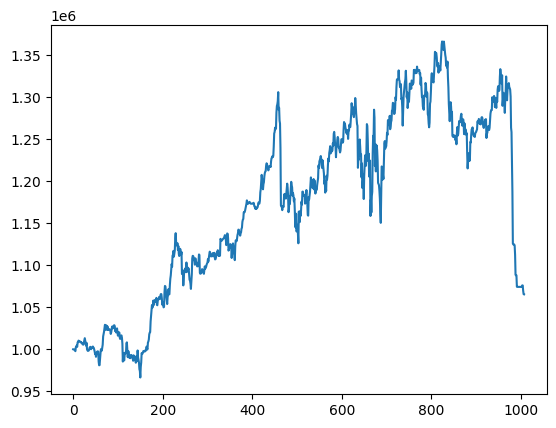

In [ ]:
%matplotlib inline
df_account_value.account_value.plot()

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class


In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return          0.015969
Cumulative returns     0.065423
Annual volatility      0.124271
Sharpe ratio           0.190123
Calmar ratio           0.072477
Stability              0.724602
Max drawdown          -0.220334
Omega ratio            1.038390
Sortino ratio          0.248930
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.001660
Daily value at risk   -0.015563
dtype: float64


In [ ]:
#baseline stats
print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(df_dji_, value_col_name = 'close')

[*********************100%***********************]  1 of 1 completed

==============Get Baseline Stats===========
Shape of DataFrame:  (1007, 8)
Annual return          0.041192
Cumulative returns     0.175044
Annual volatility      0.151149
Sharpe ratio           0.343742
Calmar ratio           0.116472
Stability              0.805698
Max drawdown          -0.353667
Omega ratio            1.074465
Sortino ratio          0.440918
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.875798
Daily value at risk   -0.018837
dtype: float64


In [ ]:
df_dji = pd.DataFrame()
df_dji['date'] = df_account_value['date']
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
print("df_dji: ", df_dji)
df_dji.to_csv("df_dji.csv")
df_dji = df_dji.set_index(df_dji.columns[0])
print("df_dji: ", df_dji)
df_dji.to_csv("df_dji+.csv")

df_account_value.to_csv('df_account_value.csv')


df_dji:              date           dji
0     2016-04-05  1.000000e+06
1     2016-04-06  9.936460e+05
2     2016-04-07  9.982645e+05
3     2016-04-08  9.908207e+05
4     2016-04-11  9.925754e+05
...          ...           ...
1003  2020-03-30  1.223512e+06
1004  2020-03-31  1.253436e+06
1005  2020-04-01  1.198067e+06
1006  2020-04-02  1.175044e+06
1007  2020-04-03           NaN

[1008 rows x 2 columns]
df_dji:                       dji
date                    
2016-04-05  1.000000e+06
2016-04-06  9.936460e+05
2016-04-07  9.982645e+05
2016-04-08  9.908207e+05
2016-04-11  9.925754e+05
...                  ...
2020-03-30  1.223512e+06
2020-03-31  1.253436e+06
2020-04-01  1.198067e+06
2020-04-02  1.175044e+06
2020-04-03           NaN

[1008 rows x 1 columns]


<a id='6.2'></a>
## 7.2 BackTestPlot

df_result_ensemble.columns:  Index(['ensemble'], dtype='object')
df_trade_date:          datadate
0     2016-01-04
1     2016-01-05
2     2016-01-06
3     2016-01-07
4     2016-01-08
...          ...
1089  2020-05-01
1090  2020-05-04
1091  2020-05-05
1092  2020-05-06
1093  2020-05-07

[1094 rows x 1 columns]
df_result_ensemble:                  ensemble
date                    
2016-04-05  1.000000e+06
2016-04-06  9.997941e+05
2016-04-07  9.998417e+05
2016-04-08  9.994375e+05
2016-04-11  9.986442e+05
...                  ...
2020-03-30  1.076138e+06
2020-03-31  1.075990e+06
2020-04-01  1.069849e+06
2020-04-02  1.065711e+06
2020-04-03  1.065423e+06

[1008 rows x 1 columns]
==============Compare to DJIA===========
result:                  ensemble           dji
date                                  
2016-04-05  1.000000e+06  1.000000e+06
2016-04-06  9.997941e+05  9.936460e+05
2016-04-07  9.998417e+05  9.982645e+05
2016-04-08  9.994375e+05  9.908207e+05
2016-04-11  9.986442e+05  9.925754e

<Figure size 1500x500 with 0 Axes>

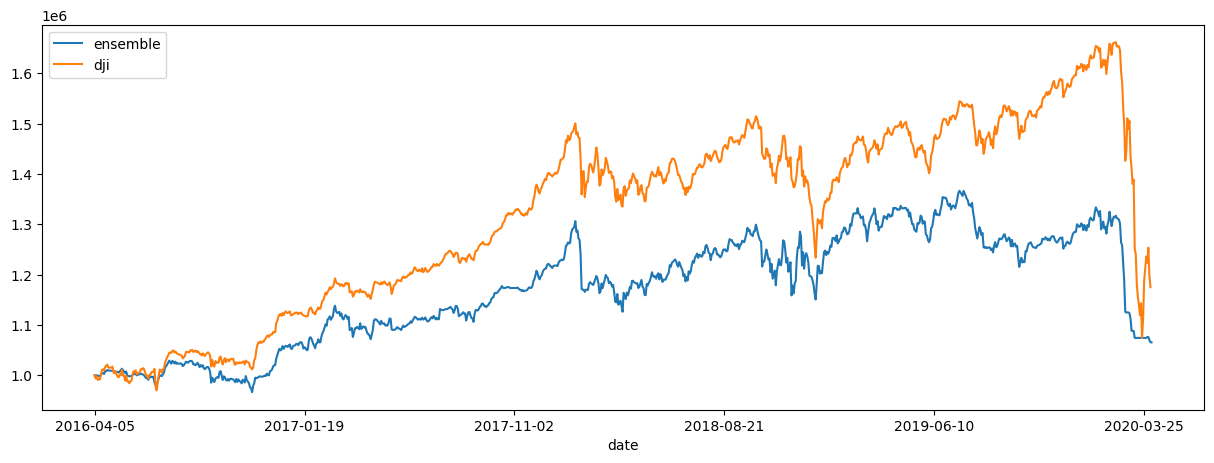

In [ ]:


# print("==============Compare to DJIA===========")
# %matplotlib inline
# # S&P 500: ^GSPC
# # Dow Jones Index: ^DJI
# # NASDAQ 100: ^NDX
# backtest_plot(df_account_value,
#               baseline_ticker = '^DJI',
#               baseline_start = df_account_value.loc[0,'date'],
#               baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])
df.to_csv("df.csv")
df_result_ensemble = pd.DataFrame({'date': df_account_value['date'], 'ensemble': df_account_value['account_value']})
df_result_ensemble = df_result_ensemble.set_index('date')

print("df_result_ensemble.columns: ", df_result_ensemble.columns)

# df_result_ensemble.drop(df_result_ensemble.columns[0], axis = 1)
print("df_trade_date: ", df_trade_date)
# df_result_ensemble['date'] = df_trade_date['datadate']
# df_result_ensemble['account_value'] = df_account_value['account_value']
df_result_ensemble.to_csv("df_result_ensemble.csv")
print("df_result_ensemble: ", df_result_ensemble)
print("==============Compare to DJIA===========")
result = pd.DataFrame()
# result = pd.merge(result, df_result_ensemble, left_index=True, right_index=True)
# result = pd.merge(result, df_dji, left_index=True, right_index=True)
result = pd.merge(df_result_ensemble, df_dji, left_index=True, right_index=True)
print("result: ", result)
result.to_csv("result.csv")
result.columns = ['ensemble', 'dji']

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();